In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

In [245]:
ss=pd.read_csv(r"C:\Users\User\Desktop\مشروع تحليل انماط النوم و معدلات الاصابة بالامراض\Sleep_health_and_lifestyle_dataset.csv")
data=pd.DataFrame(ss)
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [319]:
data.count()

Gender                     374
Age                        374
Occupation                 374
Sleep Duration             374
Quality of Sleep           374
Physical Activity Level    374
Stress Level               374
BMI Category               374
Blood Pressure             374
Heart Rate                 374
Daily Steps                374
Sleep Disorder             374
dtype: int64

In [317]:
data.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [251]:
convert_cate_to_num = ['Gender' , 'Occupation' , 'BMI Category' , 'Blood Pressure' , 'Sleep Disorder' , 'Sleep Duration']
for i in convert_cate_to_num:
    if i in data.columns:
        data[i] = data[i].astype('category').cat.codes
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,27,9,3,6,42,6,3,11,77,4200,-1
1,1,28,1,4,6,60,8,0,9,75,10000,-1
2,1,28,1,4,6,60,8,0,9,75,10000,-1
3,1,28,6,1,4,30,8,2,22,85,3000,1
4,1,28,6,1,4,30,8,2,22,85,3000,1


In [253]:
#this is another way to make it but it takes more time to make for every category column
data['Sleep Disorder'] = data['Sleep Disorder'].astype('category')
data['Sleep Disorder'] = data['Sleep Disorder'].cat.codes
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,27,9,3,6,42,6,3,11,77,4200,0
1,1,28,1,4,6,60,8,0,9,75,10000,0
2,1,28,1,4,6,60,8,0,9,75,10000,0
3,1,28,6,1,4,30,8,2,22,85,3000,2
4,1,28,6,1,4,30,8,2,22,85,3000,2


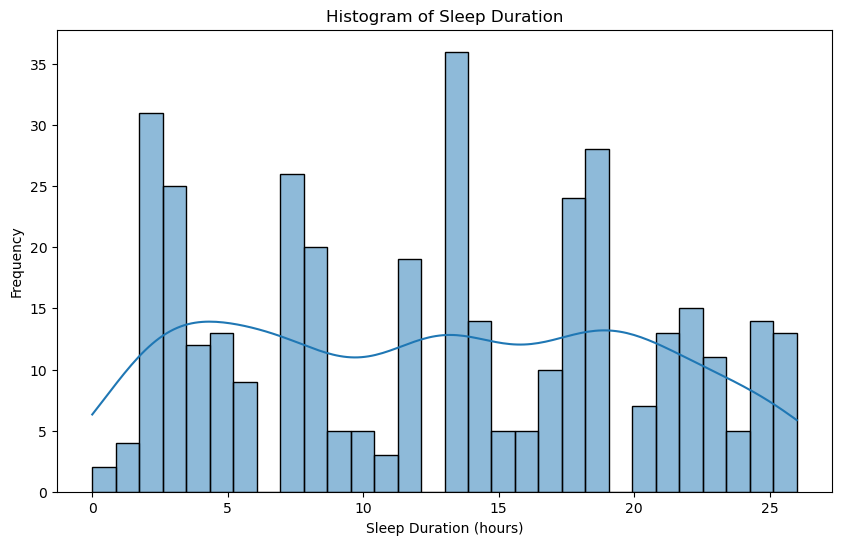

In [254]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Sleep Duration'], kde=True ,  bins=30) 
plt.title('Histogram of Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show();

<Axes: ylabel='Sleep Duration'>

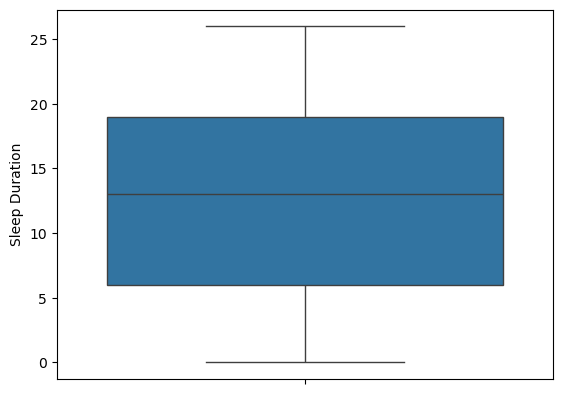

In [256]:
sns.boxplot(data['Sleep Duration'])

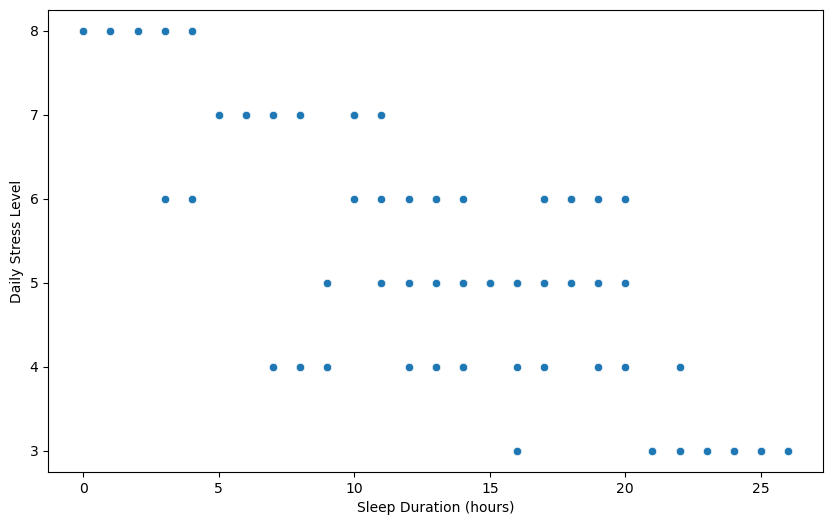

In [257]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['Sleep Duration'] , y=data['Stress Level'])
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Daily Stress Level')
plt.show();

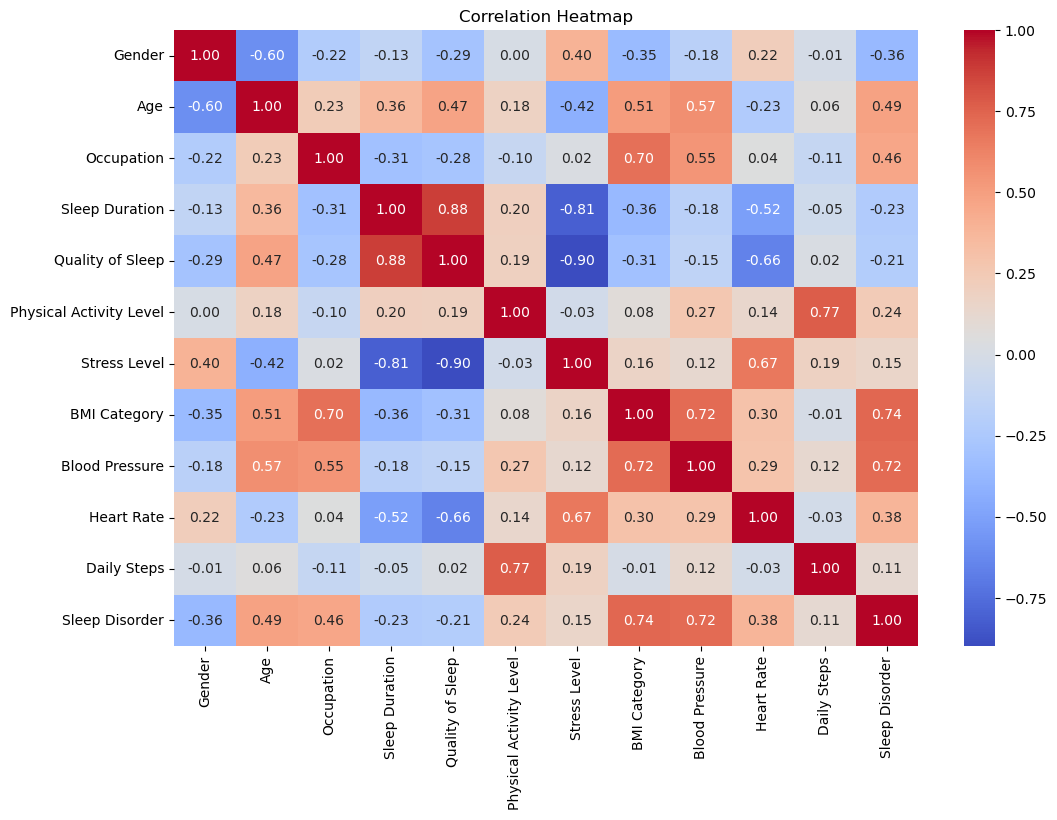

In [259]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show();

In [260]:
summary_duration = data['Sleep Duration'].describe()
IQR= summary_duration['75%'] - summary_duration['25%']
IQR

13.0

In [262]:
Sleep_Duration = data['Sleep Duration']
Blood_Pressure = data['Blood Pressure']
Calc_Pearson = stats.pearsonr(Sleep_Duration , Blood_Pressure)
print(f'pearson correlation: {Calc_Pearson[0]:.2f} , p_value: {Calc_Pearson[1]:.4f}')
# Calc_Pearson[0] --> Accesses the Pearson correlation coefficient to display its value
# Calc_Pearson[1] --> Accesses the p-value to assess the significance of the correlation

pearson correlation: -0.18 , p_value: 0.0005


In [264]:
Calc_Spearman = stats.spearmanr(Sleep_Duration , Blood_Pressure)
print(f'spearman correlation: {Calc_Spearman[0]:.2f} , pvalue: {Calc_Spearman[1]:.4f}')
# alow p-value indicates a strong statistical significance of the relationship between sleep duration and blood pressure warranting further investigation

spearman correlation: -0.17 , pvalue: 0.0012


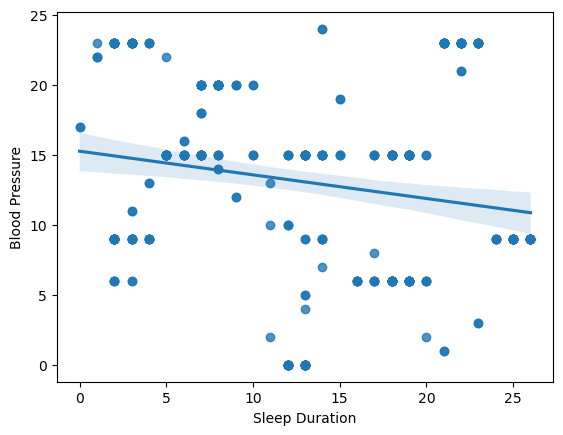

In [265]:
sns.regplot(x=Sleep_Duration , y=Blood_Pressure);

In [266]:
X= data.drop(['Sleep Disorder'] , axis=1)
y= data['Sleep Disorder']

In [267]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.25 , random_state=16)

In [268]:
Logistic_Regression = LogisticRegression(random_state=16 , max_iter=5000 ,  solver='liblinear')
Logistic_Regression.fit(X_train , y_train)

LogisticRegression(max_iter=5000, random_state=16, solver='liblinear')

In [269]:
log_reg_pre = Logistic_Regression.predict(X_test)
log_reg_prob = Logistic_Regression.predict_proba(X_test)
print("Logistic Regression Report:\n" , classification_report(y_test, log_reg_pre))
print('LogisticRegression_prob (OVO):', roc_auc_score(y_test, log_reg_prob, multi_class='ovo'))
print('LogisticRegression_prob (OVR):', roc_auc_score(y_test, log_reg_prob, multi_class='ovr'))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95        64
           1       0.76      0.93      0.84        14
           2       0.82      0.88      0.85        16

    accuracy                           0.91        94
   macro avg       0.86      0.91      0.88        94
weighted avg       0.92      0.91      0.92        94

LogisticRegression_prob (OVO): 0.9749116443452381
LogisticRegression_prob (OVR): 0.9767294337606837


In [273]:
Decision_Trees = DecisionTreeClassifier()
Decision_Trees.fit(X_test , y_test)

DecisionTreeClassifier()

In [275]:
tree_pre = Decision_Trees.predict(X_test)
tree_pre_prob = Decision_Trees.predict_proba(X_test)
print("Decision Tree Report:\n", classification_report(y_test, tree_pre))
print('DecisionTree_prob (OVO):', roc_auc_score(y_test, tree_pre_prob, multi_class='ovo'))
print('DecisionTree_prob (OVR):', roc_auc_score(y_test, tree_pre_prob, multi_class='ovr'))

Decision Tree Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98        64
           1       1.00      1.00      1.00        14
           2       0.93      0.88      0.90        16

    accuracy                           0.97        94
   macro avg       0.97      0.95      0.96        94
weighted avg       0.97      0.97      0.97        94

DecisionTree_prob (OVO): 0.9978841145833334
DecisionTree_prob (OVR): 0.9971354166666666


In [279]:
Random_Forests = RandomForestClassifier()
Random_Forests.fit(X_train , y_train)

RandomForestClassifier()

In [284]:
Random_Forests_pre = Random_Forests.predict(X_test)
Random_Forests_pre_prob = Random_Forests.predict_proba(X_test)
print("Random Forest Report:\n", classification_report(y_test, Random_Forests_pre))
print('RandomForest_prob (OVO):', roc_auc_score(y_test, Random_Forests_pre_prob, multi_class='ovo'))
print('RandomForest_prob (OVR):', roc_auc_score(y_test, Random_Forests_pre_prob, multi_class='ovr'))

Random Forest Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97        64
           1       0.86      0.86      0.86        14
           2       0.78      0.88      0.82        16

    accuracy                           0.93        94
   macro avg       0.87      0.90      0.88        94
weighted avg       0.93      0.93      0.93        94

RandomForest_prob (OVO): 0.9607747395833334
RandomForest_prob (OVR): 0.9602335164835165


In [285]:
estimator = LogisticRegression(solver='liblinear' , max_iter=5000)
Recursive_Feature_Elimination = RFE(estimator)
Recursive_Feature_Elimination.fit(X_train , y_train)

RFE(estimator=LogisticRegression(max_iter=5000, solver='liblinear'))

In [287]:
recursive_feature_eli_pre = Recursive_Feature_Elimination.predict(X_test)
recursive_feature_eli_pre_prob = Recursive_Feature_Elimination.predict_proba(X_test)
print("Recursive Feature Elimination Report:\n", classification_report(y_test, recursive_feature_eli_pre))
print('RecursiveFeatureEli_prob (OVO):', roc_auc_score(y_test, recursive_feature_eli_pre_prob, multi_class='ovo'))
print('RecursiveFeatureEli_prob (OVR):', roc_auc_score(y_test, recursive_feature_eli_pre_prob, multi_class='ovr'))

Recursive Feature Elimination Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        64
           1       0.71      0.86      0.77        14
           2       0.76      0.81      0.79        16

    accuracy                           0.88        94
   macro avg       0.81      0.86      0.83        94
weighted avg       0.89      0.88      0.89        94

RecursiveFeatureEli_prob (OVO): 0.9260835193452381
RecursiveFeatureEli_prob (OVR): 0.9352630876068376


In [291]:
# we want to make confusion matrix so i do it in easy way using for loop because the confusion takes only 1 algo prediction
# first step i make a list that groups together the predictions from different models
predict_values = {
    'log_reg_pre': log_reg_pre,  
    'tree_pre': tree_pre,        
    'Random_Forests_pre': Random_Forests_pre,
    'recursive_feature_eli_pre': recursive_feature_eli_pre 
}
# second step i initialize an empty list to store confusion matrices
conf_mat_append = []
# third step i make Loop through the items in the dictionary
for model_name, pred in predict_values.items():  # 'items()' helps us get both the names of the models and their predictions --> i mean the predict in first line 
    conf = metrics.confusion_matrix(y_test, pred)
    conf_mat_append.append((model_name, conf))

# 4rd step we make this for loop to print the model_name and confusion matrix
for model_name, conf in conf_mat_append:
    print(f'{model_name} confusion:\n {conf}\n')

log_reg_pre confusion:
 [[59  3  2]
 [ 0 13  1]
 [ 1  1 14]]

tree_pre confusion:
 [[63  0  1]
 [ 0 14  0]
 [ 2  0 14]]

Random_Forests_pre confusion:
 [[61  1  2]
 [ 0 12  2]
 [ 1  1 14]]

recursive_feature_eli_pre confusion:
 [[58  4  2]
 [ 0 12  2]
 [ 2  1 13]]



In [293]:
param_grid = {
    'n_estimators': [50, 100, 200],    # total number of models to build
    'max_features': ['sqrt', 'log2'],  # number of features to consider when splitting
    'max_depth': [None, 10, 20, 30],   # maximum depth of each individual model
    'min_samples_split': [2, 5, 10],   # minimum samples required to create a split
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
#  n_jobs --> for faster execution --> utilizes all CPU cores for maximum speed
#  verbose --> for detailed output during the process
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200}


In [294]:
ada_boost = AdaBoostClassifier(n_estimators=50, algorithm='SAMME') # SAMME.R is preferred for efficiency and faster convergence use it for models that support probabilities, otherwise use SAMME for simplicity
ada_boost.fit(X_train, y_train)
ada_pred = ada_boost.predict(X_test)
print("AdaBoost Report:\n", classification_report(y_test, ada_pred))
print('AdaBoost AUC:', roc_auc_score(y_test, ada_boost.predict_proba(X_test), multi_class='ovo'))

AdaBoost Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95        64
           1       0.93      0.93      0.93        14
           2       0.75      0.94      0.83        16

    accuracy                           0.93        94
   macro avg       0.89      0.93      0.90        94
weighted avg       0.94      0.93      0.93        94

AdaBoost AUC: 0.9694242931547619
